# Orientation coherence of the Monet stimulus

Here $X(\theta, \nu)$ is the Fourier transform of the initial noise image represented in polar coordinates $(\varphi, \nu)$ where $\theta$ is the orientation, $\nu$ is the spatial frequency along that orientation. 

To impart orientation coherence to noise movies in the Monet stimulus, the noise image is filtered with an orientation band-pass filter $G(\theta, c)$ the oriented noise:

$$\hat X(\varphi, \nu; c) = G(\varphi-\theta; c) X(\varphi, \nu)$$

The parameter $c$ is the *coherence*. 

The orientation filter is constructed as 
$$G(\theta; c) = \sqrt{c}H(c \theta)$$

where $$H(\psi) = \begin{cases} \frac 1 2 + \frac 1 2 \cos \psi \quad & \text{if } |\psi| < \pi
\\ 0 \quad & \text{otherwise}\end{cases}$$
is the Hanning function.

Let's consider two common coherence values $c = 2.5$ and $c=4.0$. 

The corresponding angular filters look as follows:

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [2]:
x, y = np.meshgrid(np.r_[-100:100], np.r_[-100:100])
Z = x + 1j * y
phi = np.angle(Z)

In [3]:
def hann(phi):
    return (0.5 + 0.5*np.cos(phi)) * (abs(phi) < np.pi)

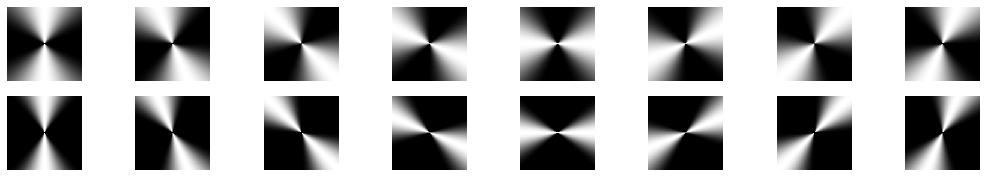

In [4]:
nori = 8
fig, axx = plt.subplots(2, nori, figsize=(18,3))
ori_range = np.r_[0:np.pi:np.pi/nori]
for ax, ori in zip(axx.T, ori_range):
    q = np.mod(phi + ori, np.pi) - np.pi/2
    for a, c in zip(ax, (2.5, 4.0)):
        a.imshow(hann(q*c), cmap='gray')
        a.axis(False)